# IMPORTING MODULES

# Load the data

In [1]:
import brainsurf.data.csv as csv_import
file_path = 'brainsurf/data/samples/adarsh/adarsh_pre.csv'
eeg_data = csv_import.convert_csv_to_eegdata(file_path)
data_summary = eeg_data.summary(300)
keys = eeg_data.keys()
print(keys)

       sec        raw
0    0.000 -16.534400
1    0.005 -23.730500
2    0.010 -24.639900
3    0.015 -22.241200
4    0.020 -19.952400
..     ...        ...
295  1.475  -0.976563
296  1.480  -4.052730
297  1.485  -3.845210
298  1.490  -1.745610
299  1.495   3.674320

[300 rows x 2 columns]
Index(['sec', 'raw'], dtype='object')


In [2]:
length = len(eeg_data)
print(length)

100424


In [3]:
column_names = eeg_data.keys()
print(column_names)

Index(['sec', 'raw'], dtype='object')


In [4]:
summary = eeg_data.summary(10)

     sec      raw
0  0.000 -16.5344
1  0.005 -23.7305
2  0.010 -24.6399
3  0.015 -22.2412
4  0.020 -19.9524
5  0.025 -18.4143
6  0.030 -20.9778
7  0.035 -20.2393
8  0.040 -21.4050
9  0.045 -21.0022


In [5]:
eeg_data.extract_frequency_bands()

In [6]:
summary = eeg_data.summary(10)

     sec      raw     alpha      beta       delta     theta     gamma
0  0.000 -16.5344  0.739153  0.340532   49.747628  4.116308  0.040695
1  0.005 -23.7305  1.676459  0.749908   42.575573  3.634073  0.038842
2  0.010 -24.6399  3.382342  2.419534  135.210048  3.892357  0.125695
3  0.015 -22.2412  1.434365  1.619343   84.618161  3.953389  0.087822
4  0.020 -19.9524  4.340995  6.558143   78.591010  5.409474  0.729613
5  0.025 -18.4143  0.908967  0.688162   34.664515  1.957621  0.036741
6  0.030 -20.9778  1.791933  1.296061   83.958023  3.180223  0.098377
7  0.035 -20.2393  1.976249  1.150905   34.516828  2.102519  0.058791
8  0.040 -21.4050  0.469199  0.218817   29.096778  1.206942  0.010982
9  0.045 -21.0022  0.614998  0.385991   70.191149  3.794692  0.018610


## EDF TO EEG

In [7]:
import brainsurf.data.edf as edf_import
edf_eeg_data = edf_import.convert_edf_to_eegdata('brainsurf/data/samples/sample_data.edf')
edf_eeg_data.summary(5)

  channel_names                                           raw_data
0       EEG Fp1  [-6.347912214236662, -5.884709218585484, -5.16...
1       EEG Fp2  [-6.719954005188079, -6.252686981002529, -5.50...
2        EEG F3  [-5.6178915175097295, -5.75924680704967, -5.68...
3        EEG F4  [-4.054461545433731, -4.4169801989776385, -4.7...
4        EEG F7  [-5.759875172350652, -5.196062582894636, -4.36...


## EXCEL TO EEG 

In [8]:
import brainsurf.data.xlsx as xlsx_import
edf_eeg_data = xlsx_import.convert_xlsx_to_eegdata('brainsurf/data/samples/sample_data.xlsx')
edf_eeg_data.summary(5)

     sec      raw
0  2.440 -9.51538
1  2.445 -8.83179
2  2.450 -7.40356
3  2.455 -7.04956
4  2.460 -7.83081


In [9]:
lowcut = 0.5 # Hz
highcut = 50 # Hz
order = 4
freqs = [0, 50] # Hz
q = 30

# Preprocessing

## Filtering

### Bandpass Filter

In [10]:
values = eeg_data['sec']
print(values)

0           0.000
1           0.005
2           0.010
3           0.015
4           0.020
           ...   
100419    194.305
100420    194.310
100421    194.315
100422    194.320
100423    194.325
Name: sec, Length: 100424, dtype: float64


In [11]:
import numpy as np
import brainsurf.utils.data as util
values = np.asarray(eeg_data['sec'], dtype=object)
sampling_freq = util.estimate_sampling_frequency(values)
print(sampling_freq)

200.00000000008976


[ -1.50562524  -8.14741752 -18.92222429 ...          nan          nan
          nan]


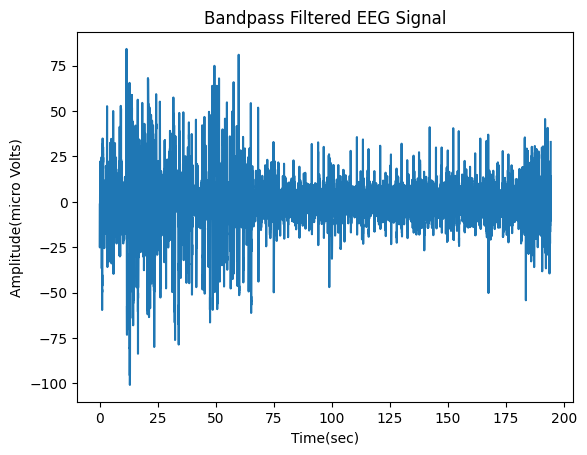

In [12]:
import brainsurf.visualization.plot_eeg_signal as plt
import brainsurf.preprocessing.filtering as filter

bandpass_filtered_eeg = filter.butter_bandpass_filter(eeg_data['raw'], lowcut, highcut, sampling_freq, order) 
print(bandpass_filtered_eeg)
plt.plot_eeg_signal(eeg_data['sec'], bandpass_filtered_eeg, 'Bandpass Filtered EEG Signal','Time(sec)','Amplitude(micro Volts)')

# Feature Extraction

In [13]:
import brainsurf.analysis.stats_analysis as stats

## Time-Domain Features

### Mean

In [14]:
csv_mean=stats.calculate_mean(bandpass_filtered_eeg)
print(csv_mean)

-0.005010748303499806


### Varience

In [15]:
csv_varience=stats.calculate_variance(bandpass_filtered_eeg)
print(csv_varience)

192.4765576638541


### Skewness 

In [16]:
csv_skewness= stats.calculate_skewness(bandpass_filtered_eeg)
print(csv_skewness)

-0.3441613904213072


### Kurtosis 

In [17]:
csv_kurtosis =stats.calculate_kurtosis(bandpass_filtered_eeg)
print(csv_kurtosis)

8.00111593847491


## Frequency-Domain Features

## Power spectral density

In [19]:
import brainsurf.visualization as vis
import brainsurf.analysis.power_spectrum as psd

freqs, psd = psd.psd_welch(bandpass_filtered_eeg, sampling_freq)
print(bandpass_filtered_eeg)

[  0.  20.  40.  60.  80. 100.]
[ -1.50562524  -8.14741752 -18.92222429 ...          nan          nan
          nan]
